<a href="https://colab.research.google.com/github/srdg/jhunter/blob/main/JHunt.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [53]:
!pip install --quiet gdown wordcloud
!gdown https://drive.google.com/uc?id=17R0165f0Bq1oUWfke3uWnK-4KvSEfOdQ\
 -O jobs.csv 

Downloading...
From: https://drive.google.com/uc?id=17R0165f0Bq1oUWfke3uWnK-4KvSEfOdQ
To: /content/jobs.csv
100% 467k/467k [00:00<00:00, 59.6MB/s]


In [54]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from collections import Counter
import operator

In [46]:
df = pd.read_csv("jobs.csv", encoding='cp1252')
print("Original number of listings : ", len(df))
df = df.drop_duplicates(df.columns.tolist()[:-1])
print("Number of listings after removing duplicated criteria : ", len(df))
df.head(5)

Original number of listings :  1200
Number of listings after removing duplicated criteria :  1152


,Role,Company,Rating,Review Count,Experience,Location,Salary,Tags,Link
0,Computer Vision Engineer,KoiReader Technologies,3.6,2,0-5 Yrs,Bangalore/Bengaluru,5 00 000 - 12 00 000 PA.,Keras python NLP Docker Image Processing ...,https://www.naukri.com/job-listings-computer-v...
1,Senior Data Scientist | CES IT LTD | CMMI Level 5,CES Ltd.,3.5,85,2-7 Yrs,Kolkata Mumbai Hyderabad/Secunderabad Pune ...,Not disclosed,IT Skills Python Machine Learning AWS Tens...,https://www.naukri.com/job-listings-senior-dat...
2,Senior Data Scientist | CES IT LTD | CMMI Level 5,CES Ltd.,3.5,85,2-7 Yrs,Kolkata Mumbai Hyderabad/Secunderabad Pune ...,Not disclosed,Datastructures AWS Lambda AWS CloudFormation...,https://www.naukri.com/job-listings-senior-dat...
3,Machine Learning Engineer,SOFTNAUTICS LLP,0.0,0,2-5 Yrs,Pune Ahmedabad,Not disclosed,Tensorflow deep learning compilers Machine L...,https://www.naukri.com/job-listings-machine-le...
4,Data Scientist - Pune - Immediate Joiner,FUTURISM TECHNOLOGIES PVT LTD,3.7,17,5-10 Yrs,Pune,Not disclosed,Keras Deep Learning computer vision PyTorch...,https://www.naukri.com/job-listings-data-scien...


In [56]:
tags = df[' Tags'].values.tolist()
tags = [i.lower() for i in tags]
tags = [line.split('  ') for line in tags]
tags = [skill for skills in tags for skill in skills]

counts = Counter(tags)

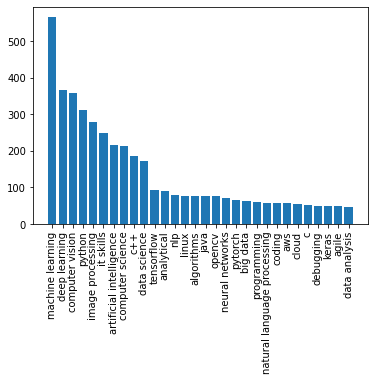

In [57]:
num_entries = 30
maxed = dict(sorted(counts.items(), key=operator.itemgetter(1), reverse=True)[:num_entries])
plt.bar(*zip(*maxed.items()))
plt.xticks(rotation='vertical')
plt.show()

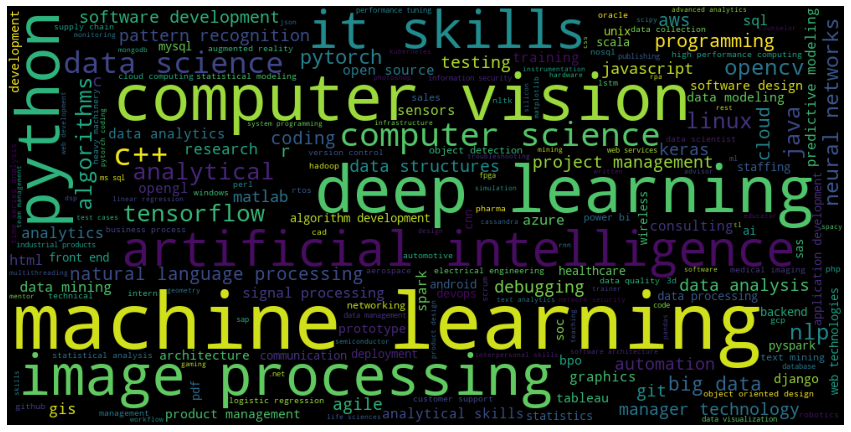

In [58]:
wordcloud = WordCloud(width = 1000, height = 500).generate_from_frequencies(counts)
plt.figure(figsize=(15,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()